# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from newsapi import NewsApiClient
# import alpaca_tade_api as tradeapi
from datetime import datetime, timedelta

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tareqnieroukh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
# Load .env enviroment variables
load_dotenv()

# Set News API Key
newsapi = NewsApiClient('ab3c00adec324252ab07553664e0d1fc')

current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
past_date = pd.Timestamp(datetime.now()- timedelta(2), tz="America/New_York").isoformat()


In [3]:
# Create a newsapi client
# YOUR CODE HERE!
def retrieve_articles(keyword):
    all_headlines = []
    all_dates = []
    articles = []
    date = datetime.strptime(current_date[:10], "%Y-%m-%d")
    end_date = datetime.strptime(past_date[:10], "%Y-%m-%d")
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    while date > end_date:
        print(f"retrieving news from: {date}")
        articles = newsapi.get_everything(
            q=keyword,
            from_param=str(date)[:30],
            to=str(date)[:30],
            language="en",
            sort_by="relevancy",
            page=1,
            page_size=100
            )
        
        date = date - timedelta(days=1)
        
    return articles


In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

btc_news = retrieve_articles("Bitcoin")



Fetching news about 'Bitcoin'
******************************
retrieving news from: 2021-09-28 00:00:00
retrieving news from: 2021-09-27 00:00:00


In [5]:
btc_news["articles"][1]["content"]

"Representations of Bitcoin and other cryptocurrencies are seen amid China's flags in this illustration picture taken September 27, 2021. REUTERS/Florence Lo/IllustrationNEW YORK, Sept 27 (Reuters) - … [+2170 chars]"

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

eth_news = retrieve_articles("Ethereum")

Fetching news about 'Ethereum'
******************************
retrieving news from: 2021-09-28 00:00:00
retrieving news from: 2021-09-27 00:00:00


In [8]:
eth_news["articles"][1]["content"]

def get_articles(articles) :

    article_body = []

    for i in range(0, len(articles["articles"])) :
        # If we wanted title we would use the following but we will use Content in this case
        #headlines.append(articles["articles"][i]["title"])
        article_body.append(articles["articles"][i]["content"])     

    return article_body

In [9]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

def articles_sentiment_summarizer(articles):
    # get the sentiment for every article then store it in a list
    article_sentiment_row = []
    
    for article in articles:
        try:

            article_sentiment_score= analyzer.polarity_scores(article)
            compound_score = article_sentiment_score["compound"]
            neg_score = article_sentiment_score["neg"]
            neu_score = article_sentiment_score["neu"]
            pos_score = article_sentiment_score["pos"]
            article_sentiment_row.append({"Compound": compound_score,
                                            "Negative": neg_score,
                                            "Neutral": neu_score ,
                                            "Positive": pos_score,
                                            "Text": article
                                         })

            
        except Exception as e:
            print(e)
            
    return article_sentiment_row




In [10]:
# Create A BTC Dataframe of the sentiment results
btc_news_articles = get_articles(btc_news)
btc_sentiment = articles_sentiment_summarizer(btc_news_articles)

# Create a DataFrame of the results
df_btc_sentiment = pd.DataFrame(btc_sentiment)
df_btc_sentiment.head()

,Compound,Negative,Neutral,Positive,Text
0,0.3291,0.0,0.925,0.075,Cryptocurrency mining is awildlyenergy-intensi...
1,0.0000,0.0,1.000,0.000,Representations of Bitcoin and other cryptocur...
2,0.5574,0.0,0.863,0.137,Miami Mayor Francis Suarez.\r\nLynne Sladky/AP...
3,0.5106,0.0,0.836,0.164,The matchups have the potential to solve key i...
4,0.0000,0.0,1.000,0.000,Representations of cryptocurrencies Bitcoin an...


In [11]:
df_btc_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.117523,0.039500,0.887820,0.072700
std,0.457067,0.060918,0.094498,0.083717
min,-0.802000,0.000000,0.628000,0.000000
25%,-0.140350,0.000000,0.824250,0.000000
50%,0.000000,0.000000,0.903500,0.060000
75%,0.514925,0.068250,0.967750,0.122250
max,0.924600,0.226000,1.000000,0.363000


In [12]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_news_articles = get_articles(eth_news)


# Calculate the Etherium Sentiment
eth_sentiment = articles_sentiment_summarizer(eth_news_articles)

# Create a DataFrame of the results
df_eth_sentiment = pd.DataFrame(eth_sentiment)
df_eth_sentiment.head()


,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.000,1.000,0.000,Representations of cryptocurrencies Bitcoin an...
1,0.6124,0.000,0.773,0.227,"Make sure to use the ""Vote Down"" button for an..."
2,0.0000,0.000,1.000,0.000,A wallet belonging to crypto exchange Bitfinex...
3,0.0000,0.000,1.000,0.000,Representations of Bitcoin and other cryptocur...
4,0.0466,0.104,0.788,0.108,"If you're like most of the world, you leave cr..."


In [17]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

df_btc_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.117523,0.039500,0.887820,0.072700
std,0.457067,0.060918,0.094498,0.083717
min,-0.802000,0.000000,0.628000,0.000000
25%,-0.140350,0.000000,0.824250,0.000000
50%,0.000000,0.000000,0.903500,0.060000
75%,0.514925,0.068250,0.967750,0.122250
max,0.924600,0.226000,1.000000,0.363000


In [22]:
print('Looking at the Bitcoin Sentiment mean of 100 articles Bitcoin 89.4% of the artles are Neutral 7.9% are positive and 2.6% are negative' 
'However overall the Compound result tells use that the artles are 22% on the positive scale'
'	Compound	Negative	Neutral	Positive'
'count	100.000000	100.000000	100.000000	100.000000'
'mean	0.220863	0.026330	0.894430	0.079250')

Looking at the Bitcoin Sentiment mean of 100 articles Bitcoin 89.4% of the artles are Neutral 7.9% are positive and 2.6% are negativeHowever overall the Compound result tells use that the artles are 22% on the positive scale	Compound	Negative	Neutral	Positivecount	100.000000	100.000000	100.000000	100.000000mean	0.220863	0.026330	0.894430	0.079250


In [25]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

df_eth_sentiment.describe()



,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.101739,0.035680,0.897390,0.066940
std,0.403918,0.061302,0.094872,0.073992
min,-0.802000,0.000000,0.525000,0.000000
25%,-0.012900,0.000000,0.824750,0.000000
50%,0.000000,0.000000,0.911500,0.057000
75%,0.396450,0.067000,1.000000,0.109250
max,0.859100,0.265000,1.000000,0.273000


In [26]:
print('Etherium is almost identical to Bitcoin in sentiment. Looking at the Ethereum Sentiment mean of 99 Ethereum articles 89.6% of the artles are Neutral 7.8% are positive and 2.6% are negative.' 
'However overall the Compound result tells use that the artles are 21.4% on the positive scale'

'	Compound	Negative	Neutral	Positive'
'count	99.000000	99.000000	99.000000	99.000000'
'mean	0.214654	0.026374	0.896949	0.076707')

Etherium is almost identical to Bitcoin in sentiment. Looking at the Ethereum Sentiment mean of 99 Ethereum articles 89.6% of the artles are Neutral 7.8% are positive and 2.6% are negative.However overall the Compound result tells use that the artles are 21.4% on the positive scale	Compound	Negative	Neutral	Positivecount	99.000000	99.000000	99.000000	99.000000mean	0.214654	0.026374	0.896949	0.076707


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [27]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [28]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')


# Expand the default stopwords list if necessary

sw.append('badwordz')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
   
    # Create a tokenized list of the words
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # and  Remove the stop words # I use "not in sw]"
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [30]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

btc_tokens = tokenizer(btc_news_articles[1])
btc_tokens


['representations',
 'bitcoin',
 'cryptocurrencies',
 'seen',
 'amid',
 'chinas',
 'flag',
 'illustration',
 'picture',
 'taken',
 'september',
 'reutersflorence',
 'loillustrationnew',
 'york',
 'sept',
 'reuters',
 'char']

In [32]:
df_btc_sentiment.head()

,Compound,Negative,Neutral,Positive,Text
0,0.3291,0.0,0.925,0.075,Cryptocurrency mining is awildlyenergy-intensi...
1,0.0000,0.0,1.000,0.000,Representations of Bitcoin and other cryptocur...
2,0.5574,0.0,0.863,0.137,Miami Mayor Francis Suarez.\r\nLynne Sladky/AP...
3,0.5106,0.0,0.836,0.164,The matchups have the potential to solve key i...
4,0.0000,0.0,1.000,0.000,Representations of cryptocurrencies Bitcoin an...


In [33]:
# Create a new tokens column for Bitcoin
tokens =[]
for i in range(len(df_btc_sentiment)) :
    article_tokens = tokenizer(df_btc_sentiment["Text"][i])
    tokens.append(article_tokens)

df_btc_sentiment["tokens"] = tokens     
df_btc_sentiment.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,0.3291,0.0,0.925,0.075,Cryptocurrency mining is awildlyenergy-intensi...,"[cryptocurrency, mining, awildlyenergyintensiv..."
1,0.0000,0.0,1.000,0.000,Representations of Bitcoin and other cryptocur...,"[representations, bitcoin, cryptocurrencies, s..."
2,0.5574,0.0,0.863,0.137,Miami Mayor Francis Suarez.\r\nLynne Sladky/AP...,"[miami, mayor, francis, suarezlynne, sladkyapc..."
3,0.5106,0.0,0.836,0.164,The matchups have the potential to solve key i...,"[matchup, potential, solve, key, issue, facing..."
4,0.0000,0.0,1.000,0.000,Representations of cryptocurrencies Bitcoin an...,"[representations, cryptocurrencies, bitcoin, e..."


In [34]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

tokens =[]
for i in range(len(df_eth_sentiment)) :
    article_tokens = tokenizer(df_eth_sentiment["Text"][i])
    tokens.append(article_tokens)

df_eth_sentiment["tokens"] = tokens     
df_eth_sentiment.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,0.0000,0.000,1.000,0.000,Representations of cryptocurrencies Bitcoin an...,"[representations, cryptocurrencies, bitcoin, e..."
1,0.6124,0.000,0.773,0.227,"Make sure to use the ""Vote Down"" button for an...","[make, sure, use, vote, button, spammy, post, ..."
2,0.0000,0.000,1.000,0.000,A wallet belonging to crypto exchange Bitfinex...,"[wallet, belonging, crypto, exchange, bitfinex..."
3,0.0000,0.000,1.000,0.000,Representations of Bitcoin and other cryptocur...,"[representations, bitcoin, cryptocurrencies, s..."
4,0.0466,0.104,0.788,0.108,"If you're like most of the world, you leave cr...","[youre, like, world, leave, cryptocurrency, cr..."


In [35]:
df_eth_sentiment["tokens"][1]

['make',
 'sure',
 'use',
 'vote',
 'button',
 'spammy',
 'post',
 'vote',
 'interesting',
 'conversation']

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [36]:
from collections import Counter
from nltk import ngrams

In [37]:
# Generate the Bitcoin N-grams where N=2
# x = ' '.join(btc_news_articles)   joins all the articles
# y = tokenizer(x) 
# ngrams(y, n=2)
# can all be combined into one sentence below
btc_grams = Counter(ngrams(tokenizer(' '.join(btc_news_articles)), n=2)).most_common(30)
btc_grams

[(('char', 'bitcoin'), 10),
 (('last', 'week'), 6),
 (('bitcoin', 'btc'), 6),
 (('cryptocurrency', 'market'), 5),
 (('cryptocurrency', 'exchange'), 5),
 (('char', 'new'), 5),
 (('sept', 'reuters'), 4),
 (('digital', 'asset'), 4),
 (('cryptocurrency', 'transaction'), 4),
 (('new', 'york'), 4),
 (('char', 'cryptocurrency'), 4),
 (('char', 'chinas'), 4),
 (('bitcoin', 'ethereum'), 3),
 (('crypto', 'exchange'), 3),
 (('mainland', 'china'), 3),
 (('p', 'char'), 3),
 (('mr', 'goxx'), 3),
 (('th', 'char'), 3),
 (('exchange', 'provider'), 3),
 (('provider', 'crypto'), 3),
 (('crypto', 'service'), 3),
 (('service', 'scrambling'), 3),
 (('scrambling', 'sever'), 3),
 (('sever', 'business'), 3),
 (('business', 'tie'), 3),
 (('tie', 'mainland'), 3),
 (('mainland', 'chinese'), 3),
 (('chinese', 'client'), 3),
 (('client', 'beijing'), 3),
 (('central', 'bank'), 3)]

In [38]:
# Generate the Ethereum N-grams where N=2
# x = ' '.join(eth_news_articles)   joins all the articles
# y = tokenizer(x) 
# ngrams(y, n=2)
# can all be combined into one sentence below
eth_grams = Counter(ngrams(tokenizer(' '.join(eth_news_articles)), n=2)).most_common(30)
eth_grams

[(('digital', 'asset'), 7),
 (('bitcoin', 'ethereum'), 6),
 (('cryptocurrency', 'market'), 6),
 (('pleaded', 'guilty'), 6),
 (('last', 'week'), 4),
 (('ha', 'announced'), 4),
 (('us', 'sanction'), 4),
 (('char', 'crypto'), 4),
 (('char', 'cryptocurrency'), 4),
 (('transaction', 'illegal'), 3),
 (('name', 'mr'), 3),
 (('mr', 'goxx'), 3),
 (('central', 'bank'), 3),
 (('char', 'new'), 3),
 (('char', 'china'), 3),
 (('china', 'ha'), 3),
 (('th', 'char'), 3),
 (('char', 'chinas'), 3),
 (('char', 'ethereum'), 3),
 (('virgil', 'griffith'), 3),
 (('north', 'korea'), 3),
 (('sept', 'prnewswire'), 3),
 (('sept', 'globe'), 3),
 (('globe', 'newswire'), 3),
 (('cryptocurrency', 'investment'), 3),
 (('investment', 'product'), 3),
 (('product', 'fund'), 3),
 (('fund', 'posted'), 3),
 (('posted', 'inflow'), 3),
 (('inflow', 'sixth'), 3)]

In [40]:
# Function token_count generates the top 10 words for a given coin
def token_count(articles, Nvalue = 3):
    """Returns the top N tokens from the frequency count"""
    
    # Combine all articles in corpus into one large string
    all_articles_joined = ' '.join(articles)
    processed = tokenizer(all_articles_joined)
  
    bigrams = ngrams(processed , n=Nvalue)
    top_10 = dict(Counter(bigrams).most_common(10))
   
    
    return top_10

In [41]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
top10_btc_words = token_count(btc_news_articles)
top10_btc_words


{('cryptocurrency', 'exchange', 'provider'): 3,
 ('exchange', 'provider', 'crypto'): 3,
 ('provider', 'crypto', 'service'): 3,
 ('crypto', 'service', 'scrambling'): 3,
 ('service', 'scrambling', 'sever'): 3,
 ('scrambling', 'sever', 'business'): 3,
 ('sever', 'business', 'tie'): 3,
 ('business', 'tie', 'mainland'): 3,
 ('tie', 'mainland', 'chinese'): 3,
 ('mainland', 'chinese', 'client'): 3}

In [42]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

top10_eth_words = token_count(eth_news_articles)
top10_eth_words

{('name', 'mr', 'goxx'): 3,
 ('sept', 'globe', 'newswire'): 3,
 ('cryptocurrency', 'investment', 'product'): 3,
 ('investment', 'product', 'fund'): 3,
 ('product', 'fund', 'posted'): 3,
 ('fund', 'posted', 'inflow'): 3,
 ('posted', 'inflow', 'sixth'): 3,
 ('inflow', 'sixth', 'consecutive'): 3,
 ('sixth', 'consecutive', 'week'): 3,
 ('consecutive', 'week', 'investor'): 3}

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

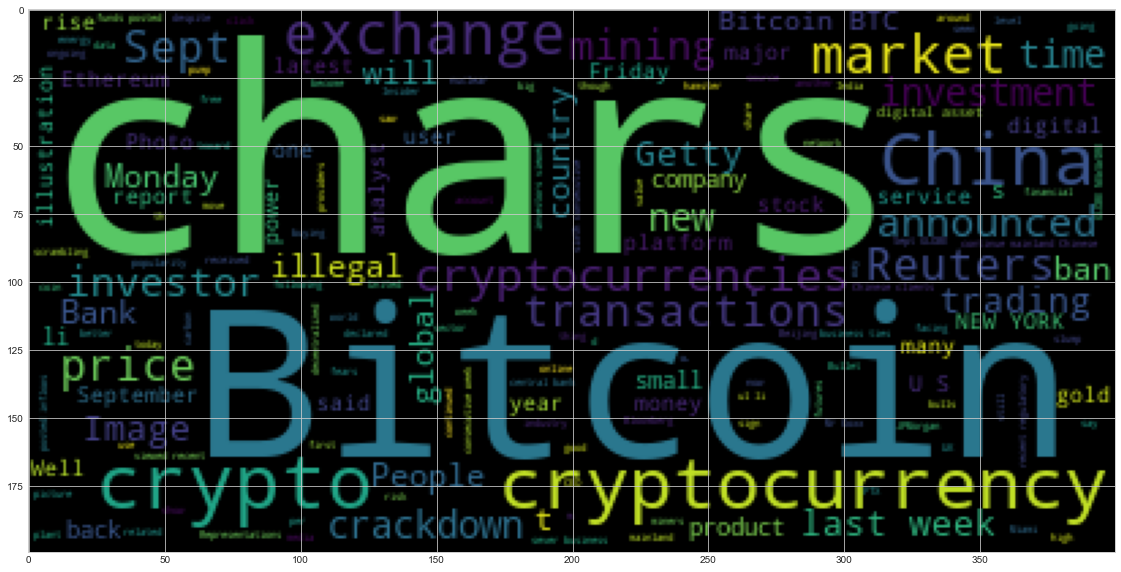

In [44]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(' '.join(btc_news_articles))
plt.imshow(wc)


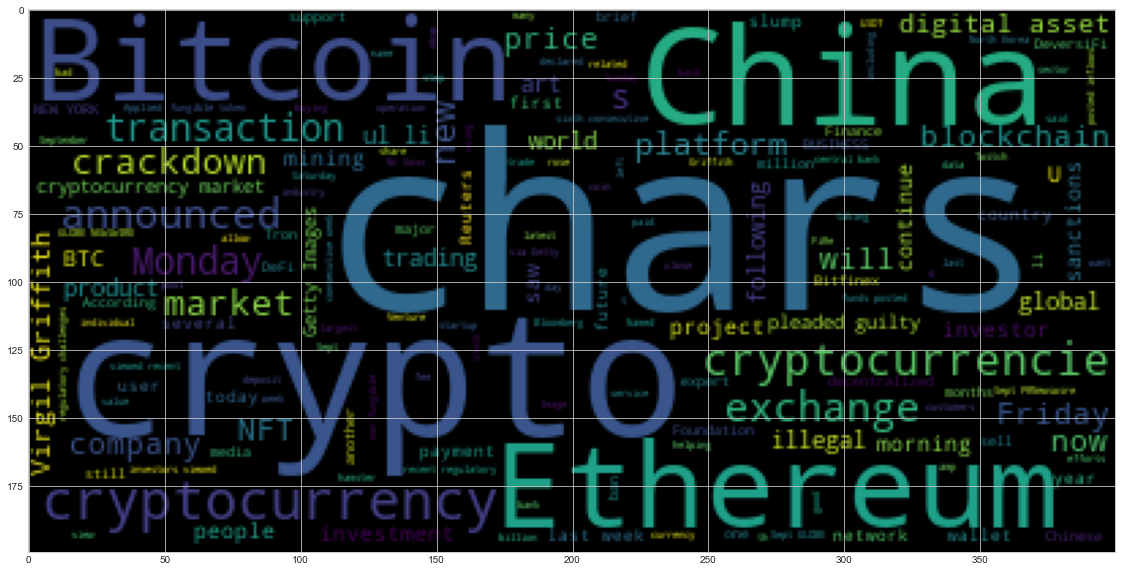

In [45]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

wc = WordCloud().generate(' '.join(eth_news_articles))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [48]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm



In [49]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [50]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
all_articles_joined = ' '.join(btc_news_articles)

In [51]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(all_articles_joined)


# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [52]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(doc, style='ent')

In [53]:
# List all Entities
# YOUR CODE HERE!

entities = [ent.text for ent in doc.ents]
entities

['electro',
 'China',
 'September 27, 2021',
 'REUTERS',
 'Florence Lo',
 'Sept 27',
 'Reuters',
 'Miami',
 'Francis Suarez',
 'Lynne Sladky',
 'AP',
 'Miami',
 'Ethereum',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic/IllustrationSINGAPORE',
 'Sept 27',
 'Reuters',
 'Crypto',
 'Monday',
 'Friday',
 'China',
 'Bitcoin',
 'China',
 'April 9, 2019',
 'REUTERS',
 'Dado Ruvic/Illustra',
 'Anthony Scaramucci',
 "The\xa0People's Bank of China",
 'Chinese',
 'The Wall Street Journal',
 'the New York Stock Exchange',
 'Xinhua/Wang Ying via',
 'Getty Images',
 'Monday',
 'the last week of September',
 'Washington',
 'Getty Images\r\n',
 'China',
 'Reuters',
 'Korean',
 'U.S.',
 'South Korea',
 'midday',
 'SEOUL',
 'Sept 27',
 'DeFi',
 'Finextra',
 'Insider Intelligence',
 'Sam Bankman-Fried',
 'FTX',
 'Crypto',
 'FTX',
 'Hong Kong',
 'Bahamas',
 'Sam Bankma',
 'The House Ways and Means Committee',
 'more than $400,000',
 'SYDNEY',
 'Sept 27',
 'Reuters',
 'Asian',
 'Monday',
 'three-year',
 'SYDNE

---

### Ethereum NER

In [54]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

all_articles_joined = ' '.join(eth_news_articles)

In [55]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(all_articles_joined)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [56]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(doc, style='ent')

In [57]:
# List all Entities
# YOUR CODE HERE!

entities = [ent.text for ent in doc.ents]
entities

['Ethereum',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic/IllustrationSINGAPORE',
 'Sept 27',
 'Reuters',
 'Bitfinex',
 '$23.7 million',
 '100,000',
 'USDT',
 'DeversiFi',
 'China',
 'September 27, 2021',
 'REUTERS',
 'Florence Lo',
 'Sept 27',
 'Reuters',
 'Crypto',
 'Monday',
 'Friday',
 'China',
 'Monday',
 'Fridays',
 'China',
 'Bitco',
 'Goxx',
 'Twitch',
 'Ethereum',
 'JPMorgan',
 'China',
 'last week',
 '$2 trillion',
 'Forbes',
 'CryptoAsset &amp',
 'Blockcha',
 'China',
 'the end of the year',
 'days',
 '2012',
 'Bloomberg Finance',
 'China',
 'Deutsche Bank',
 'New Delhi',
 'China',
 'Monday',
 '10',
 'Ethereum',
 'China',
 'several months',
 'Ethereum\r\nEthereum',
 '4.68%',
 'Sunday',
 '0.22%',
 'Saturday',
 'Ethereum',
 'the week',
 '8.05%',
 '3,060.71',
 'late morning',
 'daily',
 'CryptoCodex',
 'China',
 'last week',
 '$1,200 + $600 + $1,400',
 '3,200',
 'second',
 'Ethereum',
 'Chinese',
 'Sept. 27',
 'Gantz',
 'Inuyashiki',
 'NFT',
 '1988',
 'Nipples Blur“',
 'Chinas',


---